In [1]:
import os
import re
import glob
import json
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from tqdm import tqdm

from itertools import chain
from collections import Counter

In [ ]:
# d_connection = pd.read_csv("../data/supports/connection.csv")
# d_connection["from"], d_connection["to"] = d_connection.connection.str.split(" - ").str
# d_connection.to_csv("../data/supports/connection_unpacked.csv", index=False)

In [2]:
sevenk_files = os.listdir("../data/7K_INDO/")
initial_files = os.listdir("../data/tweets/")

In [3]:
sevenk_files = list(filter(lambda x: x.endswith(".json"), sevenk_files))
initial_files = list(filter(lambda x: x.endswith(".json"), initial_files))

In [4]:
d_connection = pd.read_csv("../data/supports/connection_unpacked.csv")

In [5]:
d_connection.columns = ['connection', 'frequency', 'from_user', 'to_user']

In [6]:
d_connection.head()

,connection,frequency,from_user,to_user
0,212Ujee2 - Par3w4_Minang,2,212Ujee2,Par3w4_Minang
1,212Ujee2 - __p3jalan____,52,212Ujee2,__p3jalan____
2,212Ujee2 - _garuda501,56,212Ujee2,_garuda501
3,212Ujee2 - Kanseulir,84,212Ujee2,Kanseulir
4,212Ujee2 - EW1jaya,41,212Ujee2,EW1jaya


In [7]:
d_connection.shape

(944165, 4)

In [8]:
d_connection.loc[d_connection.to_user.isna(), "to_user"] = "null"

## Network Analysis

In [9]:
d_connection.sort_values(by="frequency", ascending=False)

,connection,frequency,from_user,to_user
87982,Tyo_rahj - _PASMANTAP,1432,Tyo_rahj,_PASMANTAP
87981,Tyo_rahj - Juanes_baretta,1233,Tyo_rahj,Juanes_baretta
87988,Tyo_rahj - SasiKiron0,1184,Tyo_rahj,SasiKiron0
87989,Tyo_rahj - garda_nuza,1098,Tyo_rahj,garda_nuza
53795,lawanpatriarki - the_magdalene,1090,lawanpatriarki,the_magdalene
87983,Tyo_rahj - 09871O4890,1087,Tyo_rahj,09871O4890
87998,Tyo_rahj - bryanvandersoon,1004,Tyo_rahj,bryanvandersoon
98530,_PASMANTAP - Tyo_rahj,985,_PASMANTAP,Tyo_rahj
88042,Tyo_rahj - kharimakharima1,925,Tyo_rahj,kharimakharima1
87985,Tyo_rahj - Resty23189880,923,Tyo_rahj,Resty23189880


In [10]:
## filter frequency > 10
d_connection_filtered = d_connection[d_connection.frequency > 50]

In [11]:
d_connection_filtered.shape

(3790, 4)

In [12]:
d_connection_filtered.loc[:, "is_self_mentioned"] = d_connection_filtered.from_user == d_connection_filtered.to_user

C:\Users\Andreas Chandra\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Andreas Chandra\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [13]:
d_connection_filtered = d_connection_filtered[d_connection_filtered.is_self_mentioned == False]

In [14]:
d_connection_filtered.shape

(3583, 5)

In [15]:
list_of_nodes = np.concatenate([d_connection_filtered.from_user.unique(), d_connection_filtered.to_user.unique()])

In [16]:
list_of_nodes = np.unique(list_of_nodes)

In [17]:
d_connection_filtered.loc[d_connection_filtered.index, "edges"] = d_connection_filtered.apply(lambda x: (x["from_user"], x["to_user"]), axis = 1)

In [18]:
list_of_edges = d_connection_filtered.edges.values

In [19]:
list_of_nodes.shape

(3106,)

In [20]:
list_of_edges.shape

(3583,)

### draw network

In [21]:
import matplotlib.pyplot as plt
import networkx as nx

In [22]:
G = nx.Graph()

In [23]:
G.add_nodes_from(list_of_nodes)
G.add_edges_from(list_of_edges)

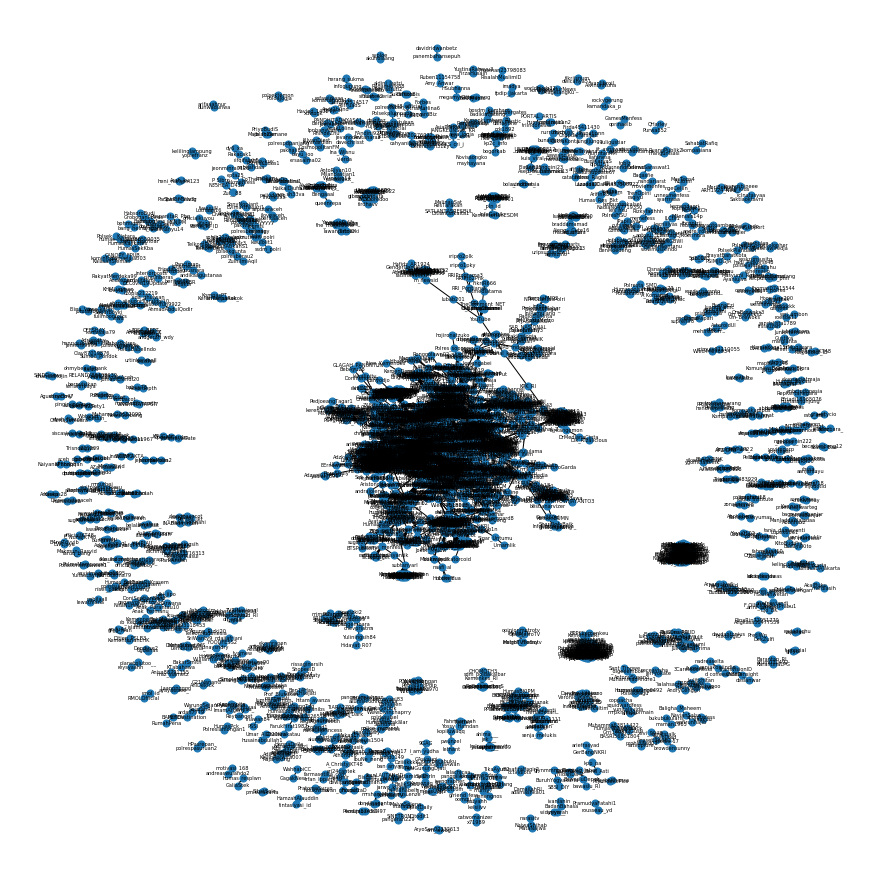

In [24]:
plt.figure(figsize=(12,12))
nx.draw(G, with_labels=True, node_size=50, font_size=5)

In [ ]:
plt.figure(figsize=(12,12))
nx.draw(G, with_labels=True, node_size=50, font_size=5)
plt.savefig("../data/figures/network.png")

## Analysis on Unobserved Users

In [12]:
mentioned = d_connection.to_user.values.tolist()

In [13]:
len(mentioned)

944165

In [14]:
all_files = sevenk_files + initial_files

In [15]:
all_files = list(map(lambda x: x.replace(".json", ""), all_files))

In [16]:
user_no_data = set(mentioned) - set(all_files)

In [17]:
# total username that we haven't get
len(user_no_data)

229435

# Analysis on Tweet Interaction

In [ ]:
with open("../data/supports/id_tweet_connection.json", "r") as f:
    d_id_tweets = json.load(f)

In [ ]:
d_id_tweets = pd.DataFrame(d_id_tweets)

In [ ]:
d_id_tweets.type.value_counts()

In [ ]:
d_id_tweets["from_id_tweet"], d_id_tweets["to_id_tweet"] = d_id_tweets.id_tweets.str

In [ ]:
d_id_tweets.from_id_tweet.value_counts()

In [ ]:
d_id_tweets.to_id_tweet.value_counts()

In [ ]:
d_id_tweets[d_id_tweets.to_id_tweet.isin(["3319260420"])]